**WSDM KKbox’s churn prediction challenge**:


Basically in this problem, we need to predict weather the user will churn or not after his/her subscription expires
When subscription ended?
For the KKbox generally their most of the revenue comes from a 30 days plan, so we’re predicting the user whose new service subscription transaction is within 30 days after his/her current subscription expiry date, so after 30 days subscription will be ended(expiry date).



**Business problem** 


Basically this problem is call churn prediction

What is churn ?

Churn quantifies the number of customers who have left your brand by cancelling their subscription or stopping paying for your services. This is bad news for any business as it costs five times as much to attract a new customer as it does to keep an existing one. A high customer churn rate will hit your company’s finances hard. By leveraging advanced artificial intelligence techniques like machine learning (ML), you will be able to anticipate potential churners who are about to abandon your services.  Still not convinced? It will cost you 16 times more to bring a new customer up to the same level as an existing customer.



**Business problem to ML formulation** 


I’m converting  this business problem to two class classification problem i.e; user will  churn=1(not subscribe) or not churn =0(re-subscribe)


***Metrics and constraints***:

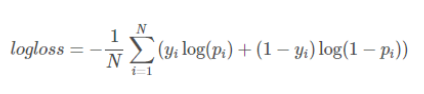

Why log loss?
See here we’re predicting the churn users, so it is always better to take the probability scores, how much probability the user will churn or not, so I’m going with the log loss metric, because it takes probability scores, and it also penalizes the error very robustly in nature.


**Business constraints**:


1)No low latency constraint 


2)we should not miss the churn users, because it will impact the business, so in the other sense recall should be high(so, misclassification should be avoided)


3)interpretability is very important: instead of just giving predicting churn or not, it's important to give why churn or not ,reasoning is pretty important


4)giving probability is mandatory what % of churn or not and also it is useful to set the threshold for better accuracy.


**Exploratory data analysis**

In [3]:
!pip install py7zr

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 13.7MB 254kB/s 


In [4]:
import os
import py7zr
from zipfile import ZipFile

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [ ]:
archive = py7zr.SevenZipFile(f"/content/drive/My Drive/NYC case study/transactions_v2.csv.7z", mode='r')
archive.extractall(path='/content/drive/My Drive/NYC case study')

In [5]:
import pandas as pd
transactions_data = pd.read_csv('/content/drive/My Drive/NYC case study/data/churn_comp_refresh/transactions_v2.csv')
transactions_data.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [ ]:
len(transactions_data.msno.unique())

1197050

In [ ]:
transactions_data.shape

(1431009, 9)

In [6]:
archive = py7zr.SevenZipFile(f"/content/drive/My Drive/NYC case study/members_v3.csv.7z", mode='r')
archive.extractall(path='/content/drive/My Drive/NYC case study')

In [7]:
import pandas as pd
members_v3=pd.read_csv('/content/drive/My Drive/NYC case study/members_v3.csv')

In [8]:
members_v3.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [9]:
members_v3.shape

(6769473, 6)

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/7163/44582/user_logs_v2.csv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604656870&Signature=YSiCPN7WjKi7Nl54RQy4vG1I96js5b7pKsHdyykMSYoexU5sNXVUfvt0ty0SKYi4H79Oov9fuk4c2n%2BeI%2BdHoQmrA3YQxFaH7Gu3u9Y0gnPsZ3IiOSAXeTfg92GQS3Xq93iMMI7mOwCdTVEydbJQkQGorSxrTDIIWiwk04SccJaOA4sG8%2FALn1kQkI80vwueTb5LpQ3RUaO77JMIVj19XattS2fWrFEXiuxvpO36cQFtfZkKF36ivRgNBqp33bnomyMBhLaQscrPL7iyAdxhajDpAiccWKS03MkmgZdNdk9H%2FZKonx2KMWawMtGzc6O%2FpuIe2MNeWZAdTOGCQ1p4yQ%3D%3D&response-content-disposition=attachment%3B+filename%3Duser_logs_v2.csv.7z" -c -O 'user_logs_v2.csv.7z'

--2020-11-03 10:01:53--  https://storage.googleapis.com/kagglesdsdata/competitions/7163/44582/user_logs_v2.csv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604656870&Signature=YSiCPN7WjKi7Nl54RQy4vG1I96js5b7pKsHdyykMSYoexU5sNXVUfvt0ty0SKYi4H79Oov9fuk4c2n%2BeI%2BdHoQmrA3YQxFaH7Gu3u9Y0gnPsZ3IiOSAXeTfg92GQS3Xq93iMMI7mOwCdTVEydbJQkQGorSxrTDIIWiwk04SccJaOA4sG8%2FALn1kQkI80vwueTb5LpQ3RUaO77JMIVj19XattS2fWrFEXiuxvpO36cQFtfZkKF36ivRgNBqp33bnomyMBhLaQscrPL7iyAdxhajDpAiccWKS03MkmgZdNdk9H%2FZKonx2KMWawMtGzc6O%2FpuIe2MNeWZAdTOGCQ1p4yQ%3D%3D&response-content-disposition=attachment%3B+filename%3Duser_logs_v2.csv.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 685951221 (654M) [application/x-7z-compressed]
Saving to: ‘user_logs_v2.csv.7z’

user_logs_v2.csv

In [10]:
archive = py7zr.SevenZipFile(f"/content/user_logs_v2.csv.7z", mode='r')
archive.extractall(path='/content/drive/My Drive/NYC case study')

In [11]:
import pandas as pd
user_logs= pd.read_csv('/content/drive/My Drive/NYC case study/data/churn_comp_refresh/user_logs_v2.csv')
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [10]:
user_logs.shape

(18396362, 9)

In [12]:
train_data= pd.read_csv('/content/drive/My Drive/NYC case study/data/churn_comp_refresh/train_v2.csv')
train_data.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


It is the train data and it contains the msno and user is not churn or not, from the above we need to combine all these users_logs,members,transactions with the train data(filter with the train data)

Now lets analyize with respect to *target* variable

In [13]:
transactions = train_data.merge(transactions_data, how='left',on='msno')
transactions.head()


,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0


In [17]:
transactions.shape

(1169418, 10)

In [14]:
members_data=transactions.merge(members_v3,how='left',on='msno')
members_data.shape

(1169418, 15)

In [15]:
#taking sum of each user and on each feature
user_logs_sum = user_logs.groupby('msno',as_index=False).sum()
user_logs_sum.drop(columns=['date'],axis=1,inplace=True)
user_logs_sum.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247


In [16]:
user_logs_sum['total_minutes'] = user_logs_sum['total_secs']/60

In [15]:
user_logs_sum.shape

(1103894, 8)

In [17]:
final_data=members_data.merge(user_logs_sum,how='left',on='msno')

In [32]:
final_data.shape

(1169418, 23)

In [18]:
final_data= final_data.drop('total_secs',axis=1)

In [19]:
#remove the duplicates if any
train_data= final_data.drop_duplicates(subset= ['msno'], keep='first')
train_data.shape

(970960, 22)

In [20]:
train_data.to_pickle('/content/drive/My Drive/final_data.pkl')

In [21]:
import pandas as pd
final_train_data = pd.read_pickle('/content/drive/My Drive/final_data.pkl')

In [22]:
final_train_data.shape

(970960, 22)

In [41]:
final_train_data.is_churn.value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

from the above we can say that it is unbalanced dataset

In [23]:
final_train_data.isna().sum()/final_train_data.shape[0]

msno                      0.000000
is_churn                  0.000000
payment_method_id         0.038500
payment_plan_days         0.038500
plan_list_price           0.038500
actual_amount_paid        0.038500
is_auto_renew             0.038500
transaction_date          0.038500
membership_expire_date    0.038500
is_cancel                 0.038500
city                      0.113283
bd                        0.113283
gender                    0.599463
registered_via            0.113283
registration_init_time    0.113283
num_25                    0.222881
num_50                    0.222881
num_75                    0.222881
num_985                   0.222881
num_100                   0.222881
num_unq                   0.222881
total_minutes             0.222881
dtype: float64

from the above we can say that there are null values in most of the features, we need fill with some value in data preprocessing step.

In [24]:
# taking features names to fill missing values with median and mode
numerical_columns = ['payment_plan_days','plan_list_price','num_25', 
                     'num_50', 'num_75', 'num_985', 'num_100','num_unq', 
                     'total_minutes','bd','actual_amount_paid']
    
categorical_columns =['payment_method_id','is_auto_renew','city',
                      'registered_via','transaction_date','registration_init_time','is_cancel','membership_expire_date']

In [25]:
def median(data,numerical_columns):
  median_dict= dict()
  for column in numerical_columns:
    median_dict[column]= np.nanmedian(data[column])
  return median_dict

In [26]:
def mode(data,categorical_columns):
  mode_dict =dict()
  for column in categorical_columns:
    mode_dict[column] = data[column].value_counts().index[0]
  return mode_dict

In [27]:
#fill the missing values
import numpy as np
median_data = median(final_train_data,numerical_columns)
mode_data= mode(final_train_data,categorical_columns)
for column in numerical_columns:
  final_train_data[column].fillna(median_data[column],inplace=True)
for column in categorical_columns:
  final_train_data[column].fillna(mode_data[column],inplace=True)

In [28]:
final_train_data.isna().sum()/final_train_data.shape[0]

msno                      0.000000
is_churn                  0.000000
payment_method_id         0.000000
payment_plan_days         0.000000
plan_list_price           0.000000
actual_amount_paid        0.000000
is_auto_renew             0.000000
transaction_date          0.000000
membership_expire_date    0.000000
is_cancel                 0.000000
city                      0.000000
bd                        0.000000
gender                    0.599463
registered_via            0.000000
registration_init_time    0.000000
num_25                    0.000000
num_50                    0.000000
num_75                    0.000000
num_985                   0.000000
num_100                   0.000000
num_unq                   0.000000
total_minutes             0.000000
dtype: float64

Text(0.5, 1.0, 'Box plot of Payment Plan Days')

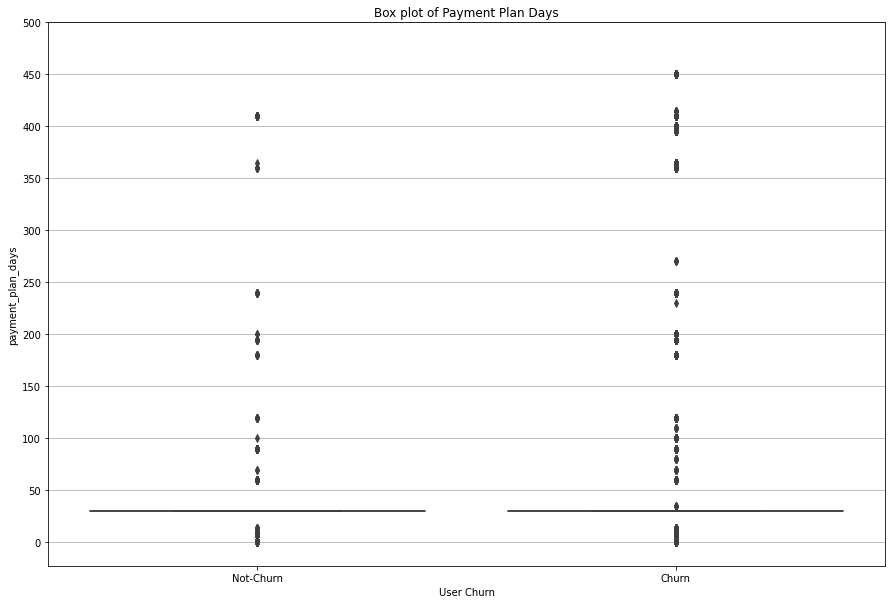

In [48]:
# BoxPlot of plan_list_price for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(y=final_train_data.payment_plan_days, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
ymax=np.max(final_train_data.payment_plan_days)
plt.yticks(np.arange(0,ymax+100,50))
plt.xlabel("User Churn")
plt.ylabel("payment_plan_days")
plt.title("Box plot of Payment Plan Days")

from the above, it was observed that most of the users will churn when the payment plan days greater than 30 days, so users with higher plan days will churn

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


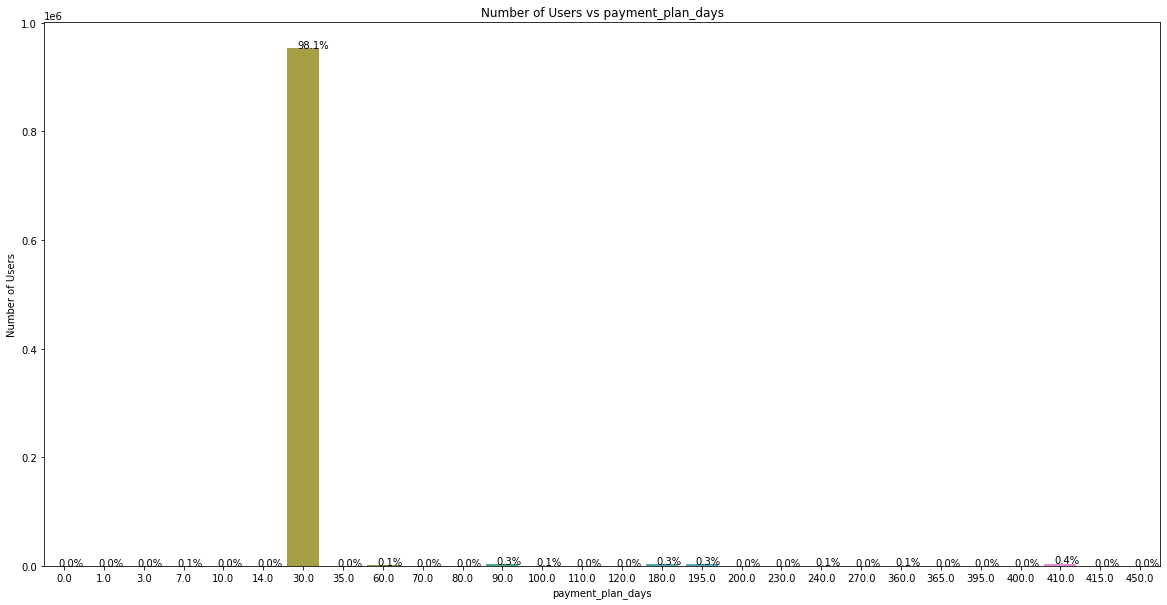

In [77]:
#plot of payment_plan_days vs number of users 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
ax = sns.countplot(final_train_data.payment_plan_days, hue_order=[30,150,180,195,200,230,400,410,415])
plt.xlabel("payment_plan_days")
plt.ylabel("Number of Users")
plt.title("Number of Users vs payment_plan_days")
total = final_train_data.shape[0]
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.25, p.get_height()))
plt.show()

from the above it was very clear that most of the users are using the 30 days plan

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


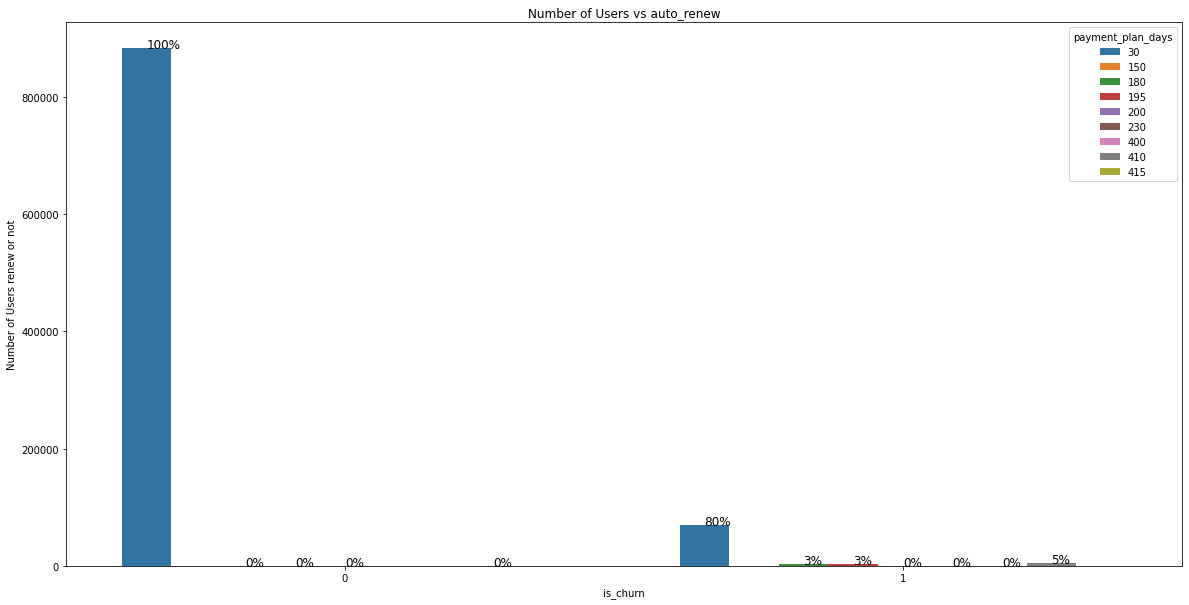

In [163]:
plt.figure(figsize=(20,10))
ax = sns.countplot('is_churn',hue='payment_plan_days',data=final_train_data,hue_order=[30,150,180,195,200,230,400,410,415])
plt.xlabel("is_churn")
plt.ylabel("Number of Users renew or not")
plt.title("Number of Users vs auto_renew")
with_hue(ax,final_train_data.is_churn,2,8)

from the above we can say that most of the plans that the users are contributing are 30,150,180,200,210,230,400,410,415 for the churn users

Text(0.5, 1.0, 'Box plot of Payment Plan Days')

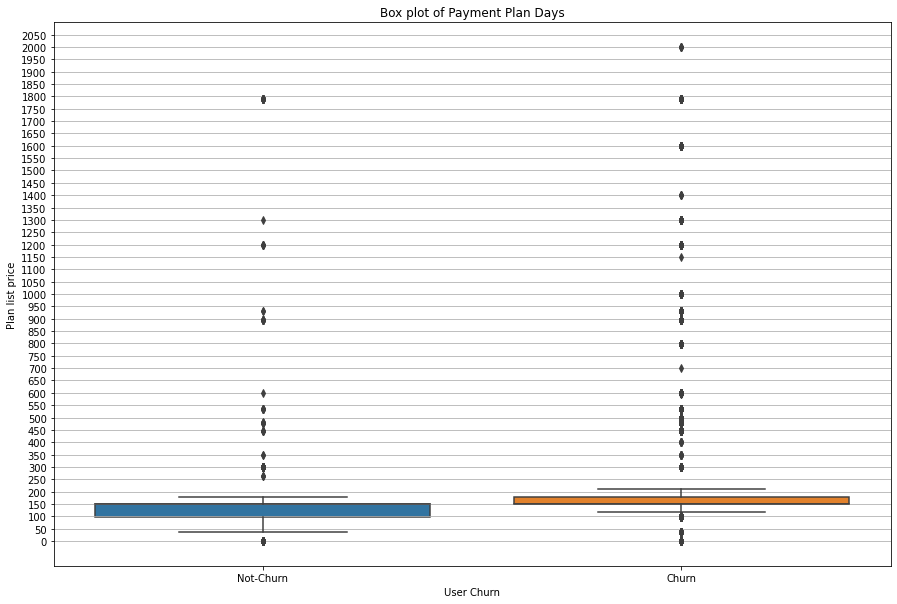

In [49]:
# BoxPlot of plan_list_price for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(y=final_train_data.plan_list_price, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
ymax=np.max(final_train_data.plan_list_price)
plt.yticks(np.arange(0,ymax+100,50))
plt.xlabel("User Churn")
plt.ylabel("Plan list price")
plt.title("Box plot of Payment Plan Days")

from the above we can see that most of the users will churn when the plan price is more >180 i.e many users are there


in the same way most of the users will not churn when the plan price ranges in 0 to 200


so higher plan price users will most likely to churn

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


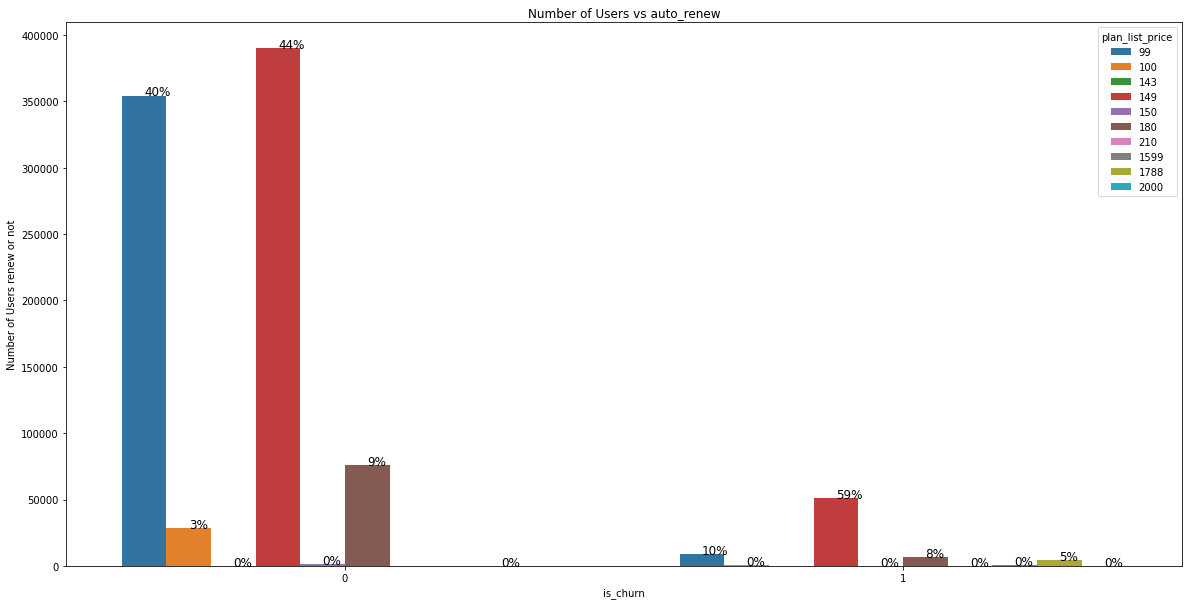

In [173]:
#note that ploting only some of the plan list prices
plt.figure(figsize=(20,10))
ax = sns.countplot('is_churn',hue='plan_list_price',data=final_train_data, hue_order=[99,100,143,149,150,180,210,1599,1788,2000])
plt.xlabel("is_churn")
plt.ylabel("Number of Users renew or not")
plt.title("Number of Users vs auto_renew")
with_hue(ax,final_train_data.is_churn,2,10)

we can observe that some users will churn when the plan is too high too i.e; 1788

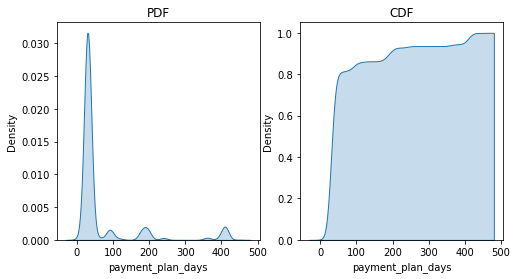

In [182]:
# kde plot of number of transactions of chunred users
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = plt.subplot(121)
sns.kdeplot(final_train_data[final_train_data.is_churn==1]['payment_plan_days'], shade=True, ax=ax1)
plt.xlabel('payment_plan_days')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(final_train_data[final_train_data.is_churn==1]['payment_plan_days'], shade=True, cumulative=True, ax=ax2)
#cdf(no_of_rated_movies_per_user)
plt.xlabel('payment_plan_days')
plt.title('CDF')
plt.show()

from then above we can say that most of the plan days are 30, around 80% of the users are using the plan 30 days plan

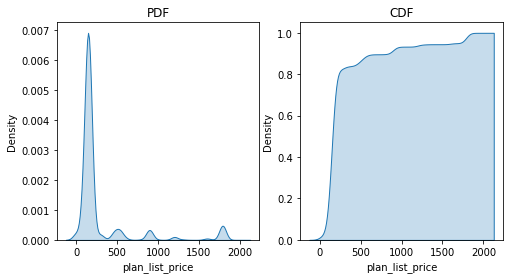

In [177]:
# kde plot of number of transactions of chunred users
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = plt.subplot(121)
sns.kdeplot(final_train_data[final_train_data.is_churn==1]['plan_list_price'], shade=True, ax=ax1)
plt.xlabel('plan_list_price')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(final_train_data[final_train_data.is_churn==1]['plan_list_price'], shade=True, cumulative=True, ax=ax2)
#cdf(no_of_rated_movies_per_user)
plt.xlabel('plan_list_price')
plt.title('CDF')
plt.show()

from the above we can say most of the users around 80% plan price ranges from 30 to  230, mean of the plan price around 180





In [73]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            if percentage> '1.0':
              ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


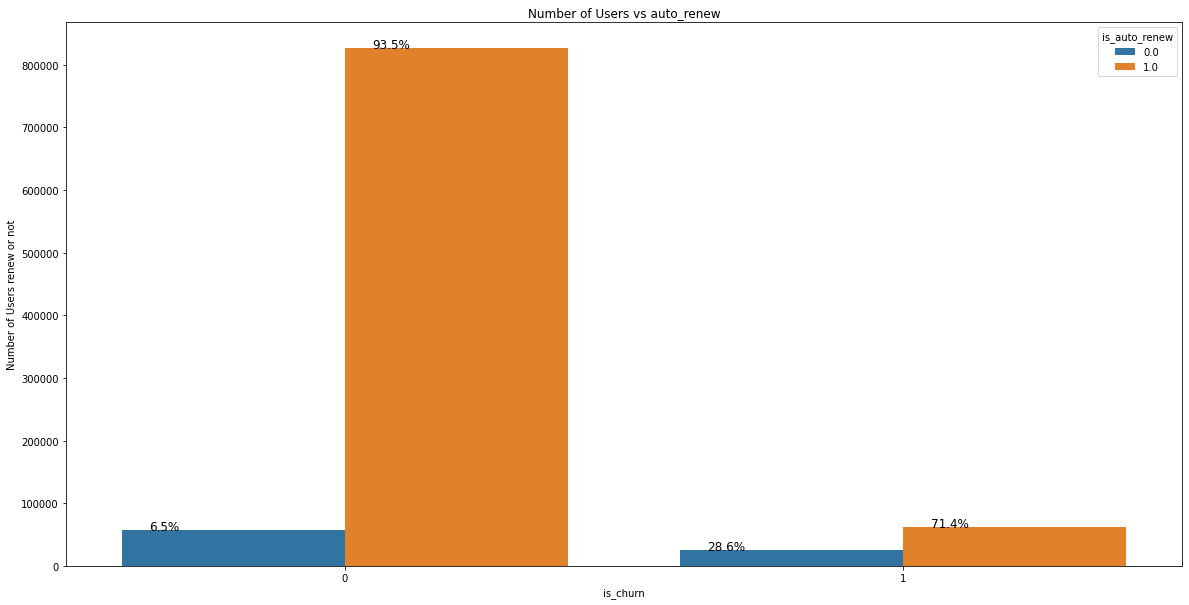

In [51]:
#ref:https://seaborn.pydata.org/generated/seaborn.countplot.html
#https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots
#Users vs is_auto_renew
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.countplot('is_churn',hue='is_auto_renew',data=final_train_data)
plt.xlabel("is_churn")
plt.ylabel("Number of Users renew or not")
plt.title("Number of Users vs auto_renew")
with_hue(ax,final_train_data.is_churn,2,2)



from the above we can say that, non churn users are more interested in auto renew than churn users

Around 93.5% of the non churn users are interested in auto renew

it was also observed that 28.6% of the churn users are not interested for auto renew



In [122]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() /2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

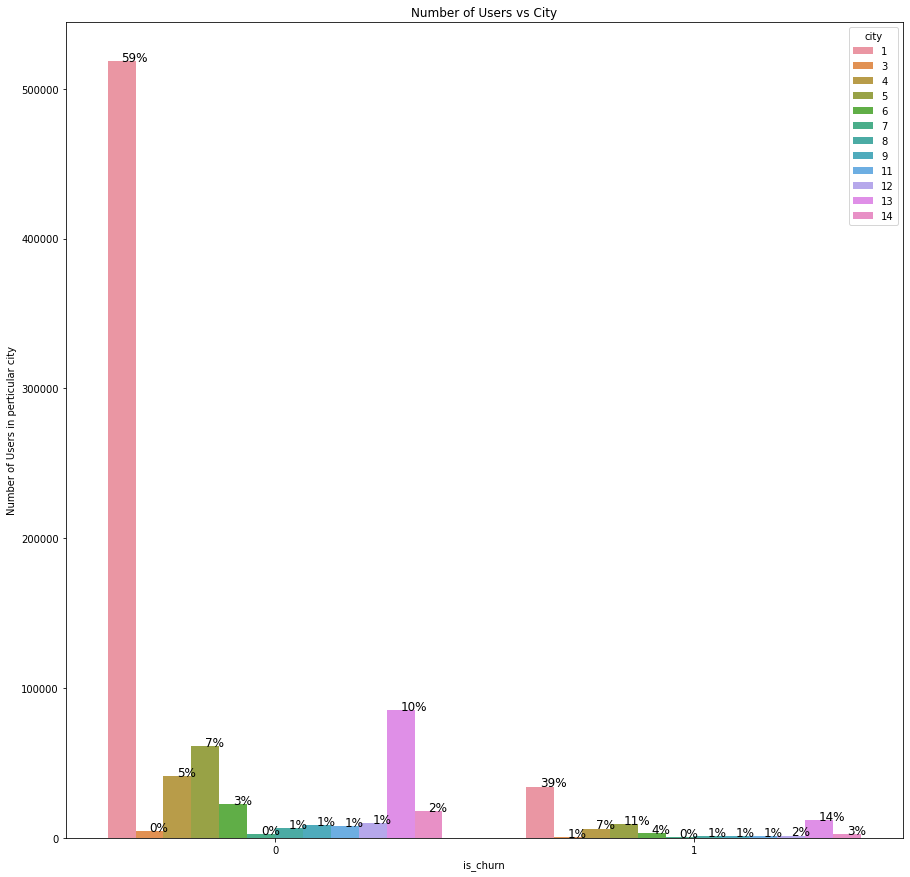

In [123]:
#https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots
#Users vs city
plt.figure(figsize=(15,15))
ax = sns.countplot(hue='city',x='is_churn',data=final_train_data, hue_order=[1,3,4,5,6,7,8,9,11,12,13,14])
plt.xlabel("is_churn")
plt.ylabel("Number of Users in perticular city")
plt.title("Number of Users vs City")
with_hue(ax,final_train_data.is_churn,2,12)



from the above observation we can say that most of the users are from city1 either they're churn users or not churn users. 

out of all non churn users around 59% of the people are from city1 and in the same way 10% are from city13

out of all churn users around 39% are from city1 and 14% are from city 13 and 11% of the churn users are from city5


we can also conclude most of the users are coming from city1, city13, city5

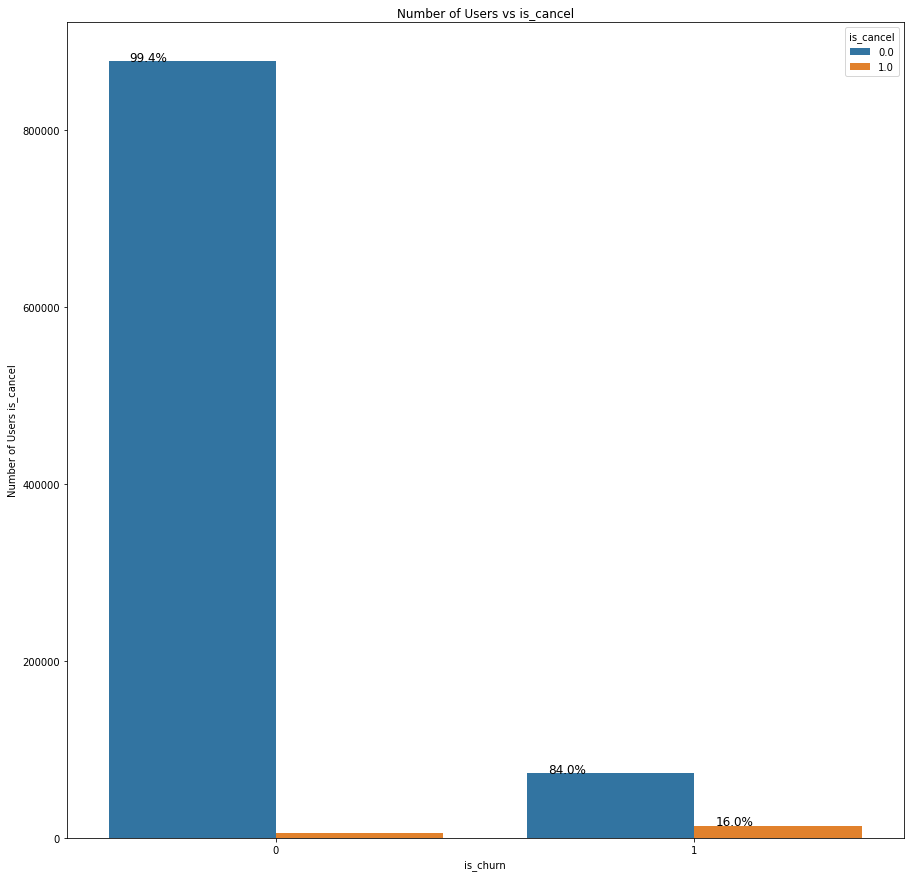

In [60]:
#https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots
#Users vs is_auto_renew
plt.figure(figsize=(15,15))
ax = sns.countplot(hue='is_cancel',x='is_churn',data=final_train_data)
plt.xlabel("is_churn")
plt.ylabel("Number of Users is_cancel")
plt.title("Number of Users vs is_cancel")
with_hue(ax,final_train_data.is_churn,2,2)


Almost all of the non churn users which are around 99.4%, didn't cancelled their services before the membership expiry



Around 16% of the churn users cancelled their services, before their plan days or we can say membership expiry. remaning users didn't cancelled the service

from the above we can say that churn users cancelled the services then the non churn users

Text(0.5, 1.0, 'Number of users vs Age')

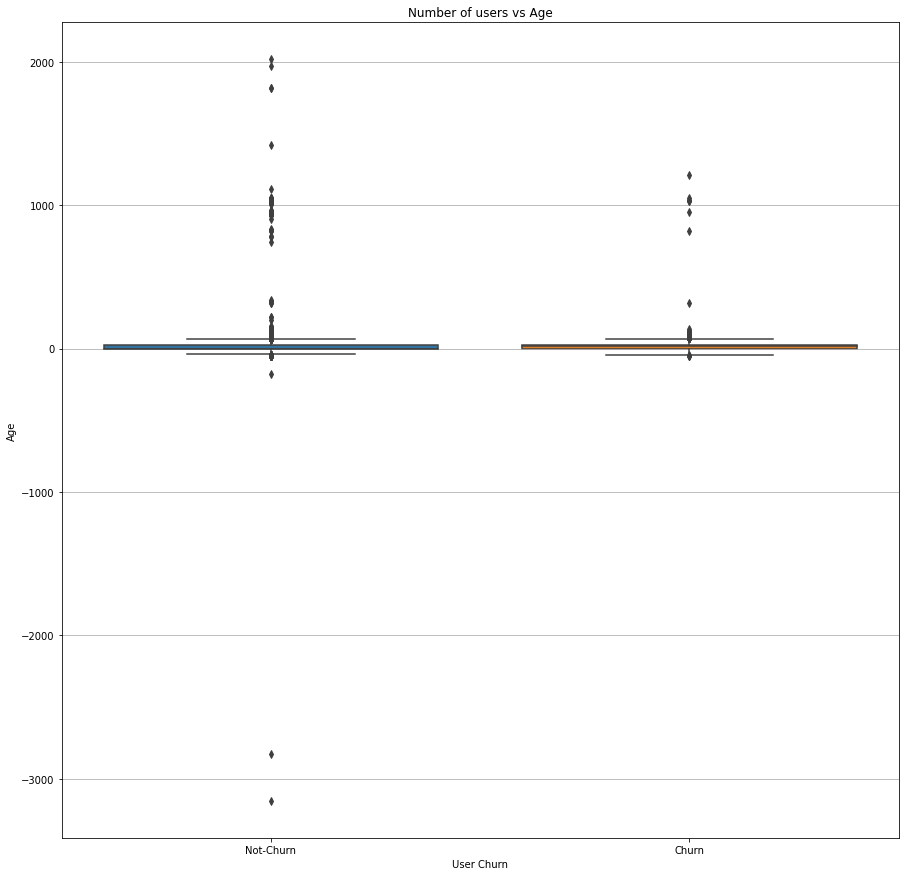

In [93]:
# BoxPlot of age for churned and not-churned users
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.bd, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("User Churn")
plt.ylabel("Age")
plt.title("Number of users vs Age")

from the above we can say that age is not able to differentiate between the churn and not churn users.much overlapping 


also note that some of the users are having the outliers,we need to preproceess this variable. 

In [63]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.bd.quantile(i/10)))
print(final_train_data.bd.quantile(.999))


percentile 0 is -3152.0
percentile 10 is 0.0
percentile 20 is 0.0
percentile 30 is 0.0
percentile 40 is 0.0
percentile 50 is 0.0
percentile 60 is 0.0
percentile 70 is 24.0
percentile 80 is 28.0
percentile 90 is 34.0
percentile 100 is 2016.0
70.0


In [71]:
print(final_train_data.bd.quantile(.59))

0.0


In [70]:
print(final_train_data.bd.quantile(.61))

17.0


from the above it was observed that most of people are listening in the age of 17 to 70, so we will put the threshold for removing those outliers in the data preprocessing step

In [ ]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width()/ 2.7
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            if percentage> '1.0':
              ax.annotate(percentage, (x, y), size = 12)
    plt.show()

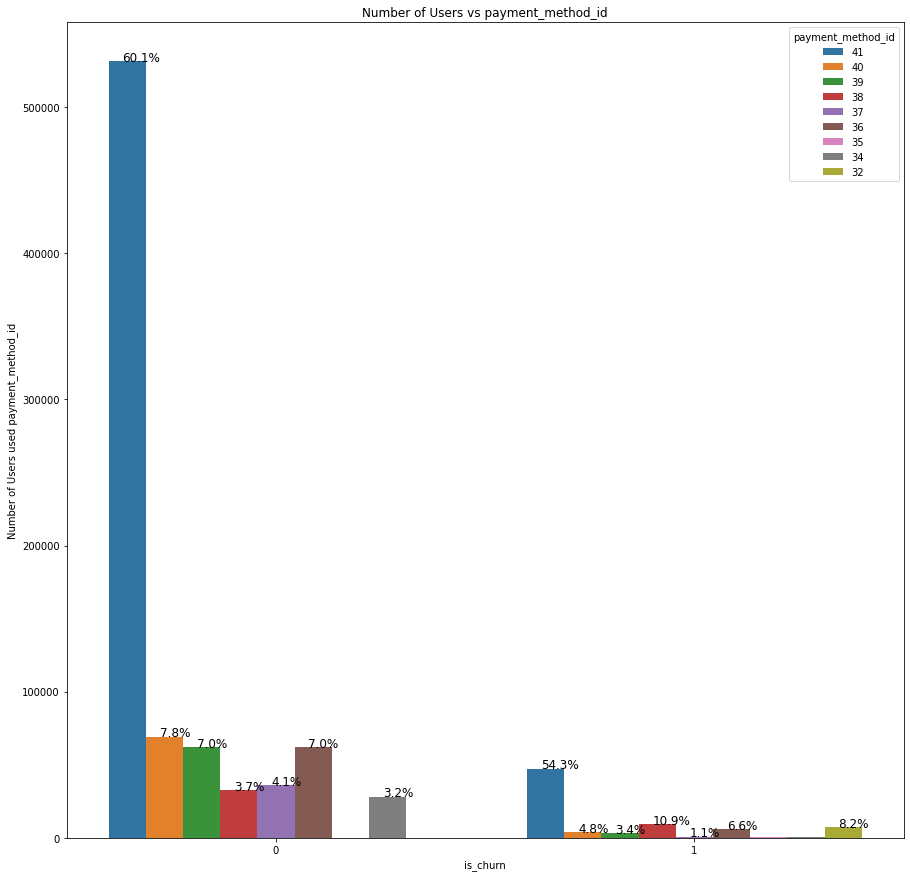

In [111]:
#https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots
#Users vs is_auto_renew
plt.figure(figsize=(15,15))
ax = sns.countplot(hue='payment_method_id',x='is_churn',data=final_train_data, hue_order=[41,40,39,38,37,36,35,34,32])
plt.xlabel("is_churn")
plt.ylabel("Number of Users used payment_method_id")
plt.title("Number of Users vs payment_method_id")
with_hue(ax,final_train_data.is_churn,2,9)

we can say that 60.1% of the non churn users are using the payment method_id 41 and rest remaining using the method it which mostly using are 39, 38 which are around 7.8% and 7% of the non churn users


we can also say that 54.3% of the churn users are using the payment_method_id 41 and it was also observed that 10.9% of the churn users are using the payment_method_id 38 which is quite interesting and it also observed that 8.2% of the churn users are using the payment_method_id 32, but in for payment_method_id 32, we don't have any non churn users.

the conclusion that payment_method 41,38,32 has to keep an eye they're having more churn users.


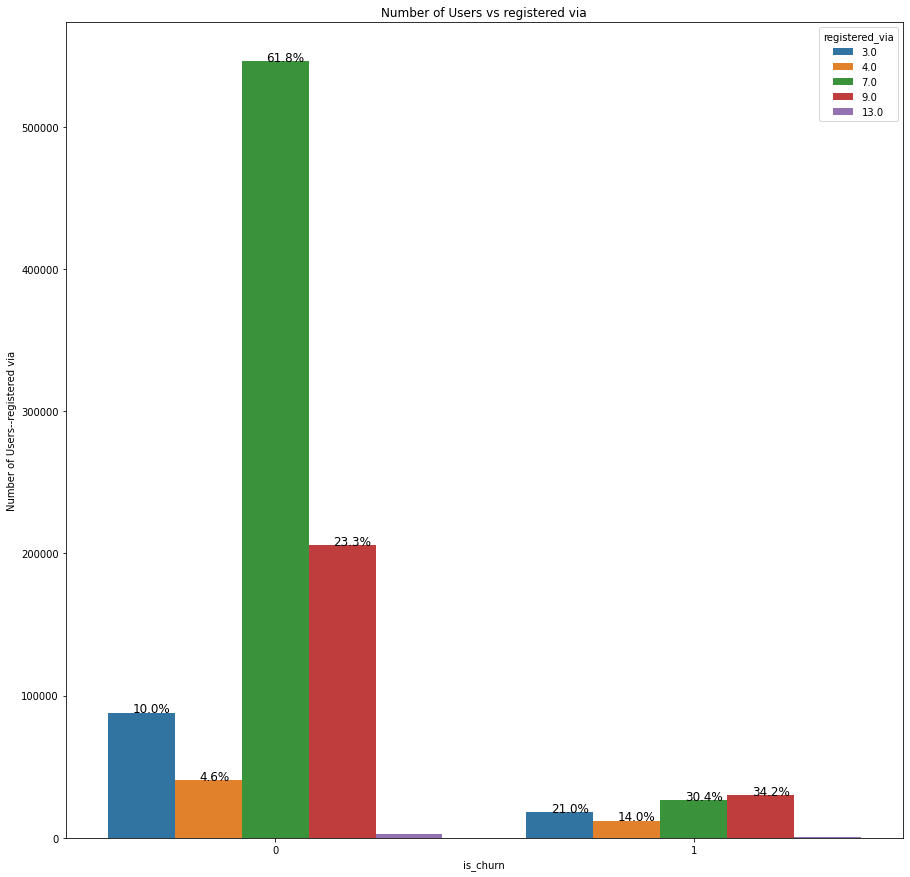

In [106]:
#https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots
#Users vs is_auto_renew
plt.figure(figsize=(15,15))
ax = sns.countplot(hue='registered_via',x='is_churn',data=final_train_data)
plt.xlabel("is_churn")
plt.ylabel("Number of Users--registered via")
plt.title("Number of Users vs registered via")
with_hue(ax,final_train_data.is_churn,2,5)

from the above we can say that 61.8% of the non churn users are registering via 7 and in the same way 23% of the non churn users are registering via 9 and it was also observed that more churn users are coming from registration 9 than 7.

so by conclusion we can say that registering via 7 is better than any other

In [151]:
final_train_data.gender.value_counts(dropna=False)

NP        582055
male      204561
female    184344
Name: gender, dtype: int64

from the above we can see that most of the values are from Nan, so we will give it as NP

In [147]:
final_train_data.gender= final_train_data.gender.fillna(value='NP')

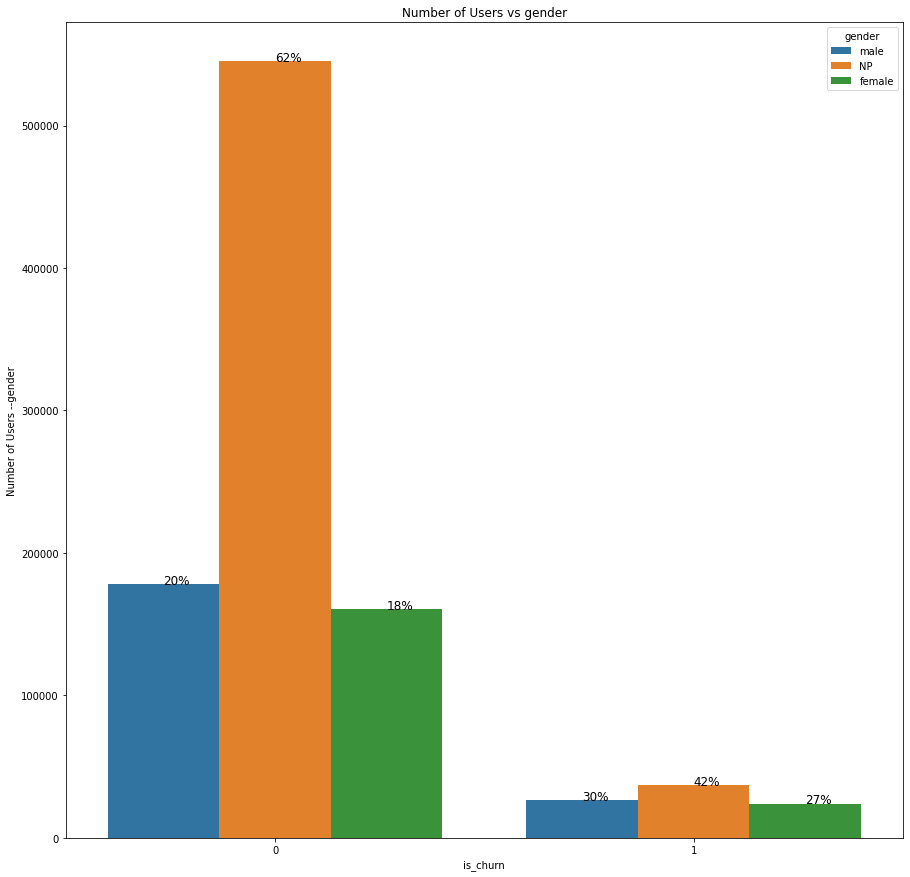

In [149]:
#https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots
#Users vs is_auto_renew
plt.figure(figsize=(15,15))
ax = sns.countplot(hue='gender',x='is_churn',data=final_train_data)
plt.xlabel("is_churn")
plt.ylabel("Number of Users --gender")
plt.title("Number of Users vs gender")
with_hue(ax,final_train_data.is_churn,2,3)

from the above we can observe that around 62% of the non churn users information is not provided and in the same way male people churn more than female(very slight increase)

most of the information is null, we will try to drop this feature beacause most of the information is same for the is_churn or not i.e; i mean the distribution will not add much value to the model even if we predict the gender also.

Text(0.5, 1.0, 'Number of users vs num_25')

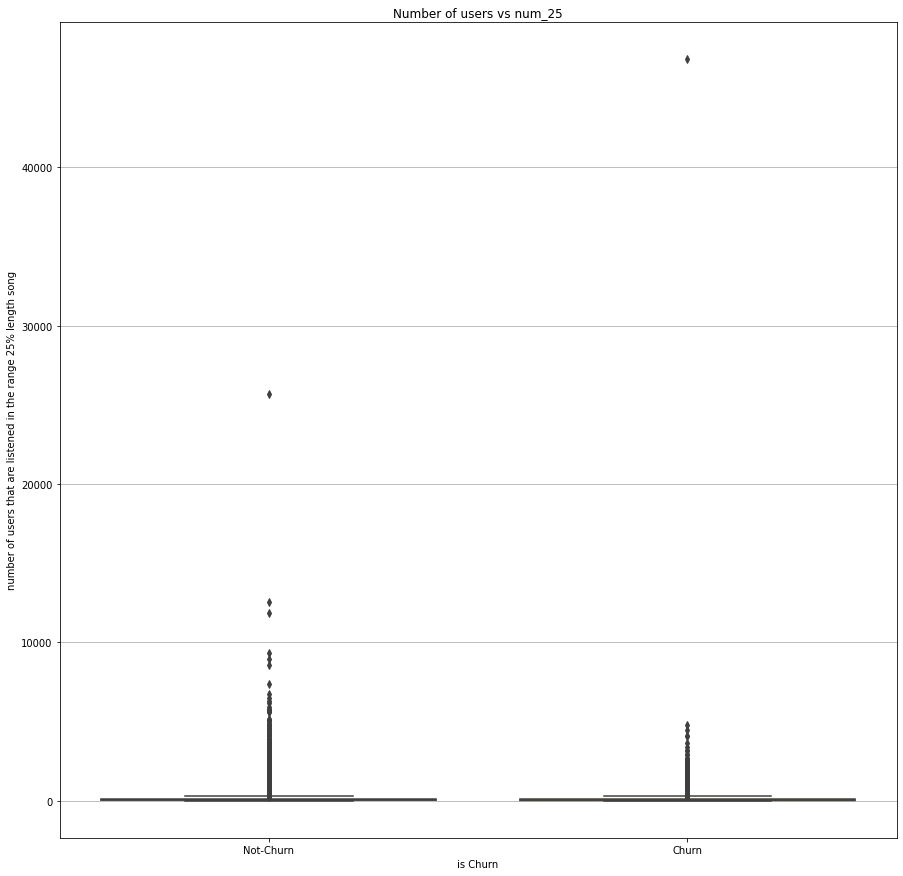

In [38]:
# BoxPlot of num50 for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.num_25, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("is Churn")
plt.ylabel("number of users that are listened in the range 25% length song")
plt.title("Number of users vs num_25")

From the above we can say that very few users who listened less number of songs which are of length 25% whatever the user is churn or not churn

this feature is not clearly seperating the churn or not churn users

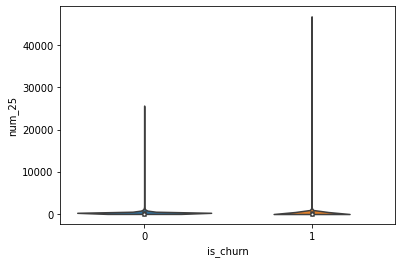

In [33]:
import matplotlib.pyplot as plt
sns.violinplot(x='is_churn',y='num_25',data=final_train_data,size=18)
plt.show()

In [72]:
final_train_data['num_25_1'] = final_train_data[final_train_data.is_churn==1]['num_25']

In [73]:
final_train_data['num_25_0'] = final_train_data[final_train_data.is_churn==0]['num_25']

In [74]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_25_1.quantile(i/10)))
print(final_train_data.num_25_1.quantile(.999))
print(final_train_data.num_25_1.quantile(.989))

percentile 0 is 0.0
percentile 10 is 5.0
percentile 20 is 15.0
percentile 30 is 30.0
percentile 40 is 51.0
percentile 50 is 55.0
percentile 60 is 55.0
percentile 70 is 74.0
percentile 80 is 121.0
percentile 90 is 218.0
percentile 100 is 46820.0
1501.6970000001165
663.0


In [75]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_25_0.quantile(i/10)))
print(final_train_data.num_25_0.quantile(.999))
print(final_train_data.num_25_0.quantile(.989))

percentile 0 is 0.0
percentile 10 is 8.0
percentile 20 is 20.0
percentile 30 is 37.0
percentile 40 is 55.0
percentile 50 is 55.0
percentile 60 is 55.0
percentile 70 is 83.0
percentile 80 is 130.0
percentile 90 is 226.0
percentile 100 is 25663.0
1478.0
672.0


from the above we can see that very less number of songs that are listened either churn or not churn

Text(0.5, 1.0, 'Number of users vs num_50')

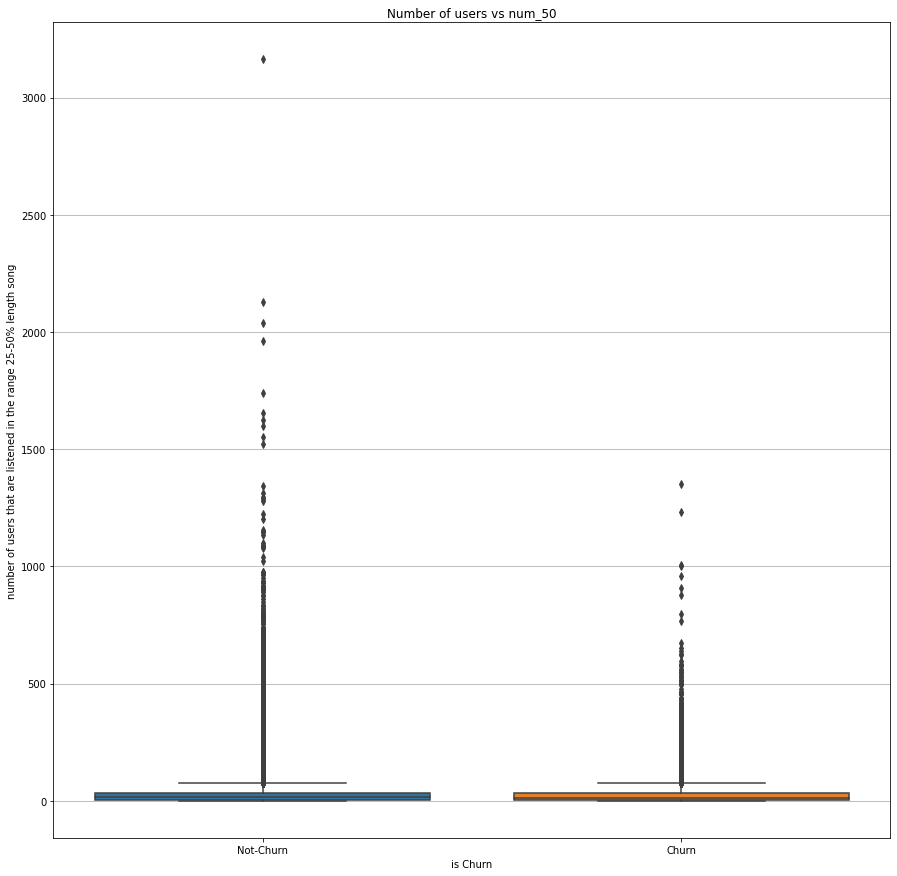

In [37]:
# BoxPlot of num25 for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.num_50, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("is Churn")
plt.ylabel("number of users that are listened in the range 25-50% length song")
plt.title("Number of users vs num_50")

here also same there are very few users who listened 25% to 50% length song.

we can say that 75% users which are around 100 users are not churn and in the same way 75% of the users which are around 100 users are churn


and we can also say that there is no clear separation between the churn and not churn users as num50 as feature

from the above we can see that churn users are more, it is obvious that only 25% song length means they're not interested in listening the songs so they're churn

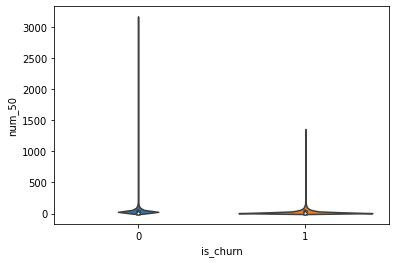

In [35]:
sns.violinplot(x='is_churn',y='num_50',data=final_train_data,size=18)
plt.show()

In [68]:
final_train_data['num_50_1'] = final_train_data[final_train_data.is_churn==1]['num_50']

In [69]:
final_train_data['num_50_0'] = final_train_data[final_train_data.is_churn==0]['num_50']

In [70]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_50_1.quantile(i/10)))
print(final_train_data.num_50_1.quantile(.999))
print(final_train_data.num_50_1.quantile(.989))

percentile 0 is 0.0
percentile 10 is 1.0
percentile 20 is 4.0
percentile 30 is 8.0
percentile 40 is 13.0
percentile 50 is 14.0
percentile 60 is 14.0
percentile 70 is 19.0
percentile 80 is 31.0
percentile 90 is 54.0
percentile 100 is 1352.0
342.67100000001665
155.0


In [71]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_50_0.quantile(i/10)))
print(final_train_data.num_50_0.quantile(.999))
print(final_train_data.num_50_0.quantile(.989))

percentile 0 is 0.0
percentile 10 is 2.0
percentile 20 is 5.0
percentile 30 is 9.0
percentile 40 is 14.0
percentile 50 is 14.0
percentile 60 is 14.0
percentile 70 is 21.0
percentile 80 is 32.0
percentile 90 is 55.0
percentile 100 is 3163.0
338.0
154.0


from the above we can see that more number of songs that are listened for the churn users than the non churn users

Text(0.5, 1.0, 'Number of users vs num_75')

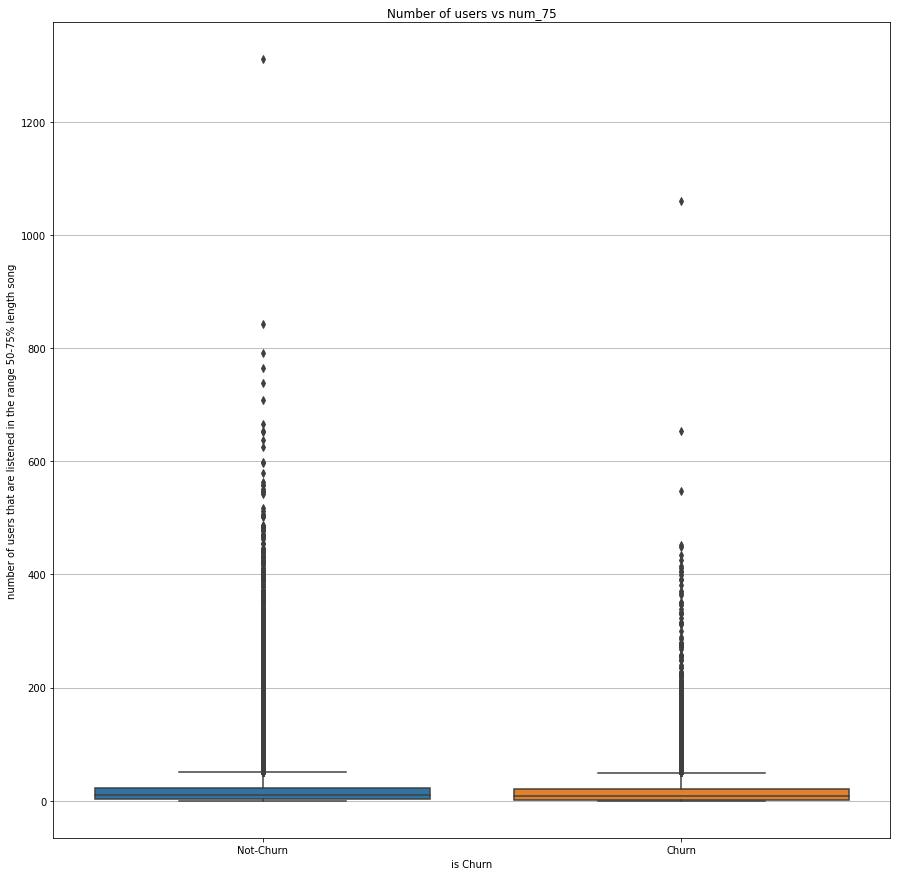

In [39]:
# BoxPlot of num_75 for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.num_75, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("is Churn")
plt.ylabel("number of users that are listened in the range 50-75% length song")
plt.title("Number of users vs num_75")

there are very few users, listening around 75% of the song length, which are around 100 users. either in not churn or churn users

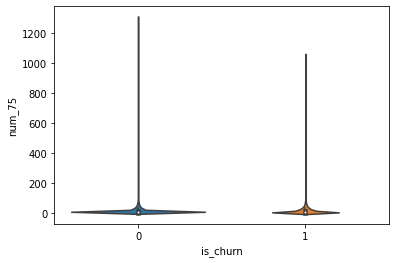

In [34]:
sns.violinplot(x='is_churn',y='num_75',data=final_train_data,size=18)
plt.show()

same conclusion can be drawn instead here,some users are not churn compared to num_25

In [64]:
final_train_data['num_75_1'] = final_train_data[final_train_data.is_churn==1]['num_75']

In [65]:
final_train_data['num_75_0'] = final_train_data[final_train_data.is_churn==0]['num_75']

In [66]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_75_1.quantile(i/10)))
print(final_train_data.num_75_1.quantile(.999))
print(final_train_data.num_75_1.quantile(.989))

percentile 0 is 0.0
percentile 10 is 1.0
percentile 20 is 3.0
percentile 30 is 5.0
percentile 40 is 9.0
percentile 50 is 10.0
percentile 60 is 10.0
percentile 70 is 13.0
percentile 80 is 20.0
percentile 90 is 34.0
percentile 100 is 1059.0
194.01300000004994
89.0


In [67]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_75_0.quantile(i/10)))
print(final_train_data.num_75_0.quantile(.999))
print(final_train_data.num_75_0.quantile(.989))

percentile 0 is 0.0
percentile 10 is 1.0
percentile 20 is 3.0
percentile 30 is 6.0
percentile 40 is 10.0
percentile 50 is 10.0
percentile 60 is 10.0
percentile 70 is 14.0
percentile 80 is 21.0
percentile 90 is 35.0
percentile 100 is 1310.0
191.0
91.0


Text(0.5, 1.0, 'Number of users vs num_100')

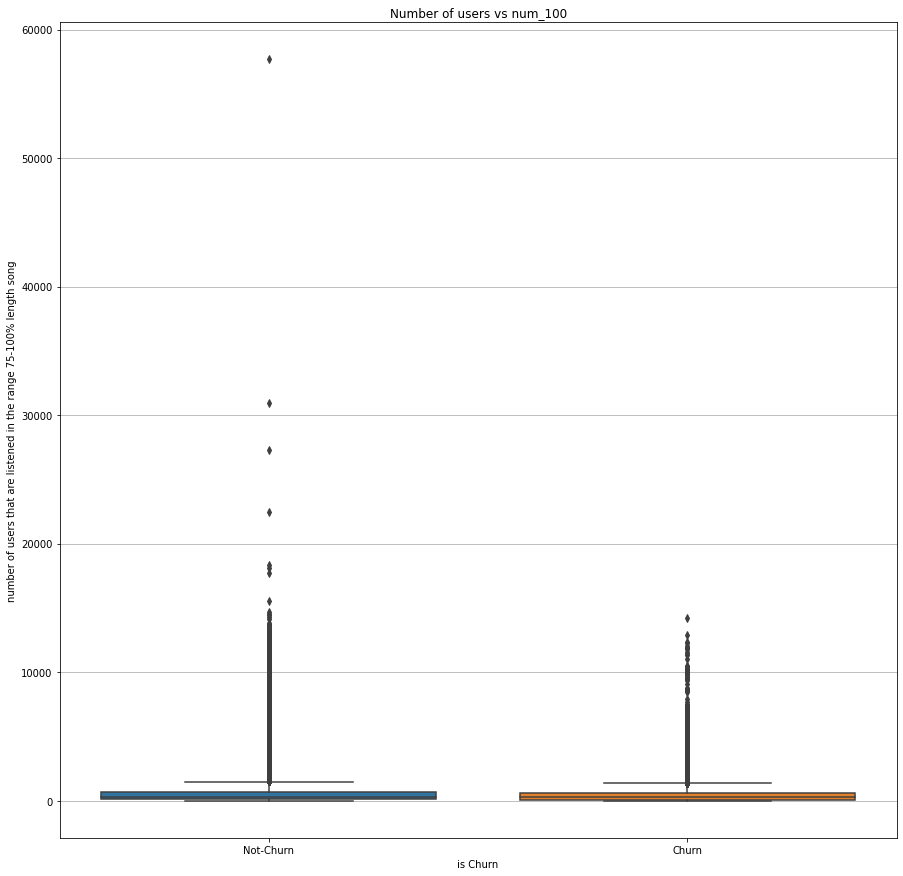

In [40]:
# BoxPlot of num_100 for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.num_100, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("is Churn")
plt.ylabel("number of users that are listened in the range 75-100% length song")
plt.title("Number of users vs num_100")

from the above we can say that around 100% of the users which are around 3000 are listening full length song either in churn or not churn users but their is  edge for non churn users over the churn users, who are having more number of users.

and their are some more users who are listening full length song

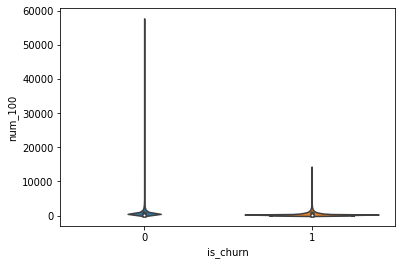

In [140]:
sns.violinplot(x='is_churn',y='num_100',data=final_train_data,size=18)
plt.show()

see here more users are not churn when they listened upto 100% length song when compared to churn users

In [61]:
final_train_data['num_100_1'] = final_train_data[final_train_data.is_churn==1]['num_100']

In [57]:
final_train_data['num_100_0'] = final_train_data[final_train_data.is_churn==0]['num_100']

In [62]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_100_1.quantile(i/10)))
print(final_train_data.num_100_1.quantile(.999))
print(final_train_data.num_100_1.quantile(.989))

percentile 0 is 0.0
percentile 10 is 27.0
percentile 20 is 81.0
percentile 30 is 162.0
percentile 40 is 274.0
percentile 50 is 305.0
percentile 60 is 305.0
percentile 70 is 381.0
percentile 80 is 590.0
percentile 90 is 990.0
percentile 100 is 14223.0
5942.684000000067
3037.0


In [60]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_100_0.quantile(i/10)))
print(final_train_data.num_100_0.quantile(.999))
print(final_train_data.num_100_0.quantile(.989))

percentile 0 is 0.0
percentile 10 is 43.0
percentile 20 is 116.0
percentile 30 is 208.0
percentile 40 is 305.0
percentile 50 is 305.0
percentile 60 is 305.0
percentile 70 is 438.0
percentile 80 is 650.0
percentile 90 is 1067.0
percentile 100 is 57675.0
6495.371000000043
3329.0


from the above we can clearly see that more number of songs are listened by non churn users than the churn users, it clearly shows that they're interested so they're re-subscribing the kkbox music

Text(0.5, 1.0, 'unique number of songs vs num_unq')

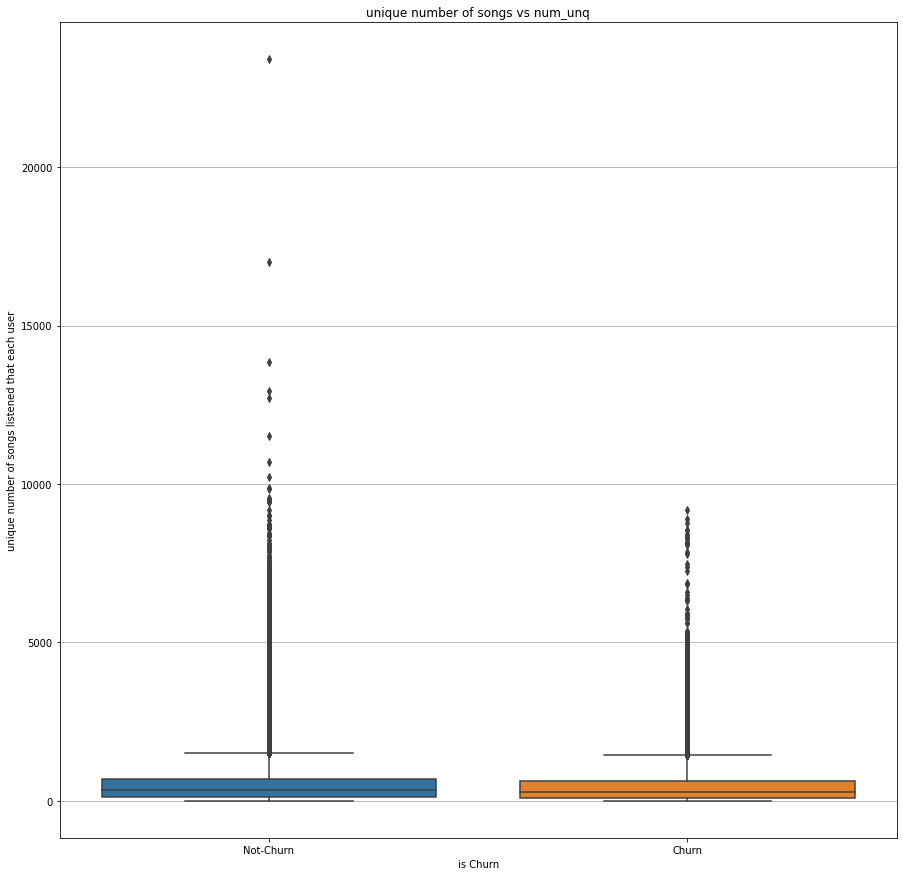

In [41]:
# BoxPlot of num_unq for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.num_unq, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("is Churn")
plt.ylabel("unique number of songs listened that each user")
plt.title("unique number of songs vs num_unq")

Most of the people are having unique number of songs which are around 3000 either in churn or not churn users.


for the not churn users there are having more number of unique songs than  the churn users.

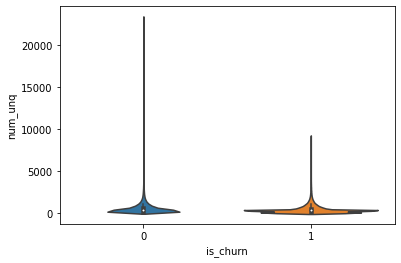

In [141]:
sns.violinplot(x='is_churn',y='num_unq',data=final_train_data,size=18)
plt.show()

many number of non churn users are having the unique number of songs compared to churn users 

In [46]:
final_train_data['num_unique_1'] = final_train_data[final_train_data.is_churn==1]['num_unq']

In [55]:
final_train_data['num_unique_0'] = final_train_data[final_train_data.is_churn==0]['num_unq']

In [56]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_unique_0.quantile(i/10)))
print(final_train_data.num_unique_0.quantile(.999))
print(final_train_data.num_unique_0.quantile(.989))

percentile 0 is 1.0
percentile 10 is 53.0
percentile 20 is 133.0
percentile 30 is 230.0
percentile 40 is 330.0
percentile 50 is 330.0
percentile 60 is 330.0
percentile 70 is 465.0
percentile 80 is 670.0
percentile 90 is 1041.0
percentile 100 is 23403.0
4492.742000000086
2618.0


In [48]:
for i in range(11):
    print("percentile {} is {}".format(i*10,final_train_data.num_unique_1.quantile(i/10)))
print(final_train_data.num_unique_1.quantile(.999))
print(final_train_data.num_unique_1.quantile(.989))

percentile 0 is 1.0
percentile 10 is 34.0
percentile 20 is 97.0
percentile 30 is 183.0
percentile 40 is 299.0
percentile 50 is 330.0
percentile 60 is 330.0
percentile 70 is 412.0
percentile 80 is 620.0
percentile 90 is 998.0
percentile 100 is 9167.0
4491.5110000006825
2493.3810000000085


from the above we can say that 90 percentile times, there are more unique number of songs for non churn users than the churn users.

Text(0.5, 1.0, 'total number of minutes vs num_unq')

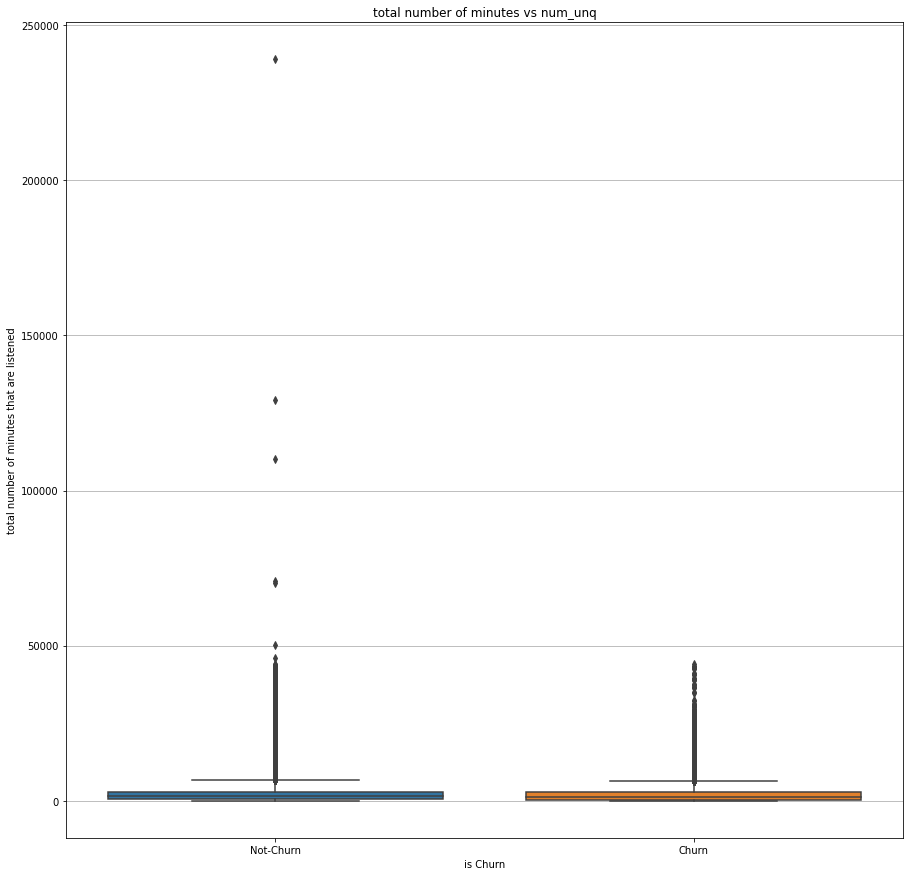

In [42]:
# BoxPlot of total_minutes for churned and not-churned users
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.grid()
sns.boxplot(y=final_train_data.total_minutes, x=final_train_data.is_churn,orient='v')
plt.xticks([0, 1], ['Not-Churn', 'Churn'])
plt.xlabel("is Churn")
plt.ylabel("total number of minutes that are listened")
plt.title("total number of minutes vs num_unq")

75% of the users are listening around 3000 minutes and who are non churn users 

75% of the users are listening around 2500 minutes and who are churn users.

churn users are listening less

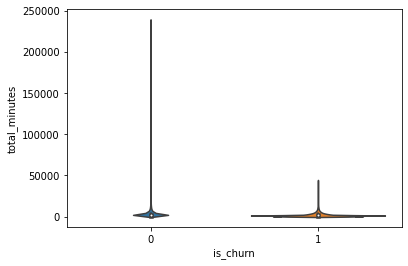

In [142]:
sns.violinplot(x='is_churn',y='total_minutes',data=final_train_data,size=18)
plt.show()

when the total minutes were increasing the number of non churn users are slightly increasing, we can see that their is slight different distribution for churn users in terms of distribution of data and not churn users.

**Bi variate analysis**

In [36]:
final_train_data.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,28.0,male,3.0,20131223.0,186.0,23.0,13.0,10.0,318.0,348.0,1343.309283
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0,13.0,20.0,male,3.0,20131223.0,0.0,4.0,2.0,0.0,26.0,30.0,116.441817
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0,13.0,18.0,male,3.0,20131227.0,239.0,57.0,32.0,22.0,205.0,432.0,1130.174450
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0,1.0,0.0,NaN,7.0,20140109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,41.0,30.0,99.0,99.0,1.0,20170117.0,20170721.0,0.0,13.0,35.0,female,7.0,20140125.0,9.0,7.0,4.0,4.0,962.0,548.0,3998.037350


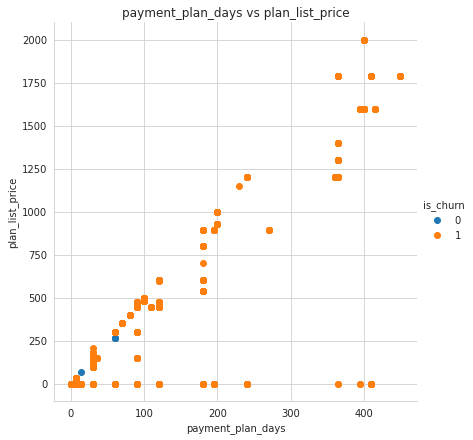

In [49]:
sns.set_style("whitegrid");
sns.FacetGrid(final_train_data,hue="is_churn", height=6) \
   .map(plt.scatter,"payment_plan_days","plan_list_price") \
   .add_legend();
plt.title('payment_plan_days vs plan_list_price')
plt.show();

from the above we can say that more the price and more the plan list price more likely to churn.

her we're unable to interpret the non churn users. but in general sense as you can see that less the plan list price and less the plan days, more likely to not churn.

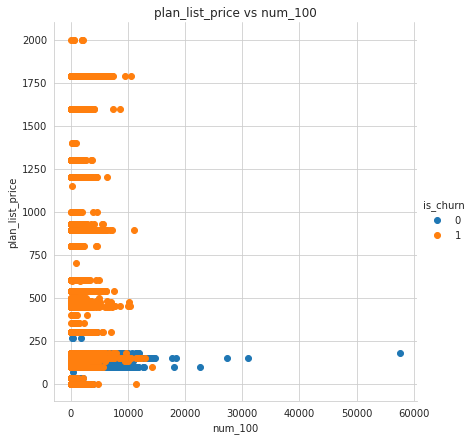

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.FacetGrid(final_train_data,hue="is_churn", height=6) \
   .map(plt.scatter,"num_100","plan_list_price") \
   .add_legend();
plt.title('plan_list_price vs num_100')
plt.show();

more number of songs listened which are of song length 100 more likely not churn

**Multi variate analysis**

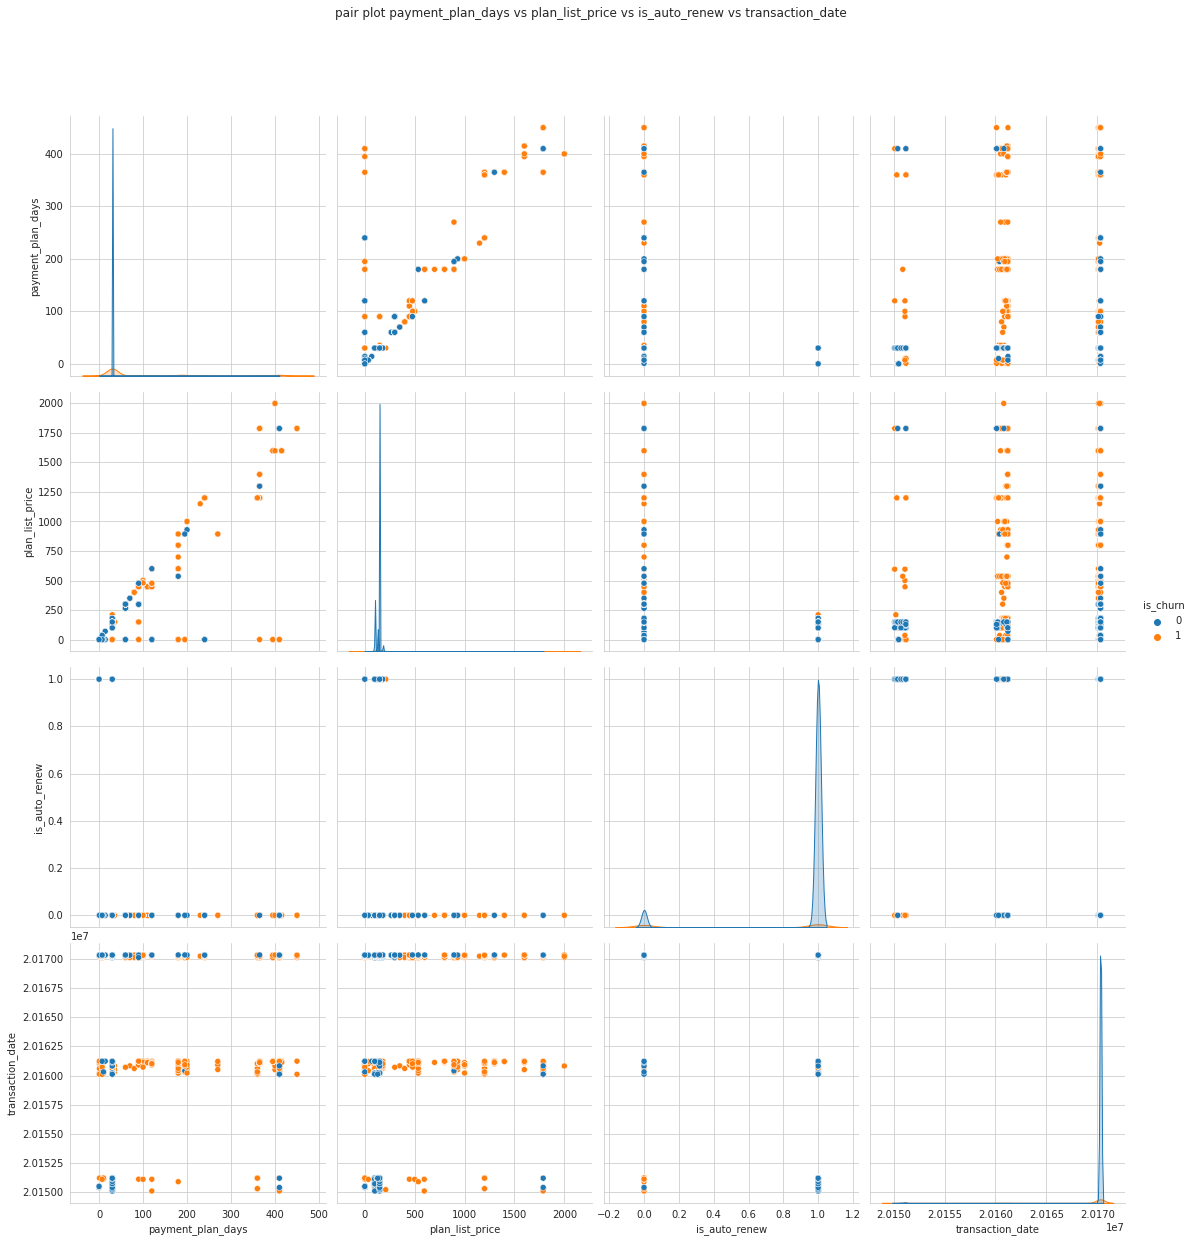

In [38]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(final_train_data, hue="is_churn", height=4, vars=["payment_plan_days","plan_list_price","is_auto_renew","transaction_date"]).fig.suptitle("pair plot payment_plan_days vs plan_list_price vs is_auto_renew vs transaction_date", y=1.08);

plt.show()

from the above it was observed that less the plan list price and less the payment plan days, they're more likely to less churn


it was also observed that more the payment plan days and more the plan list price they're more likely to churn

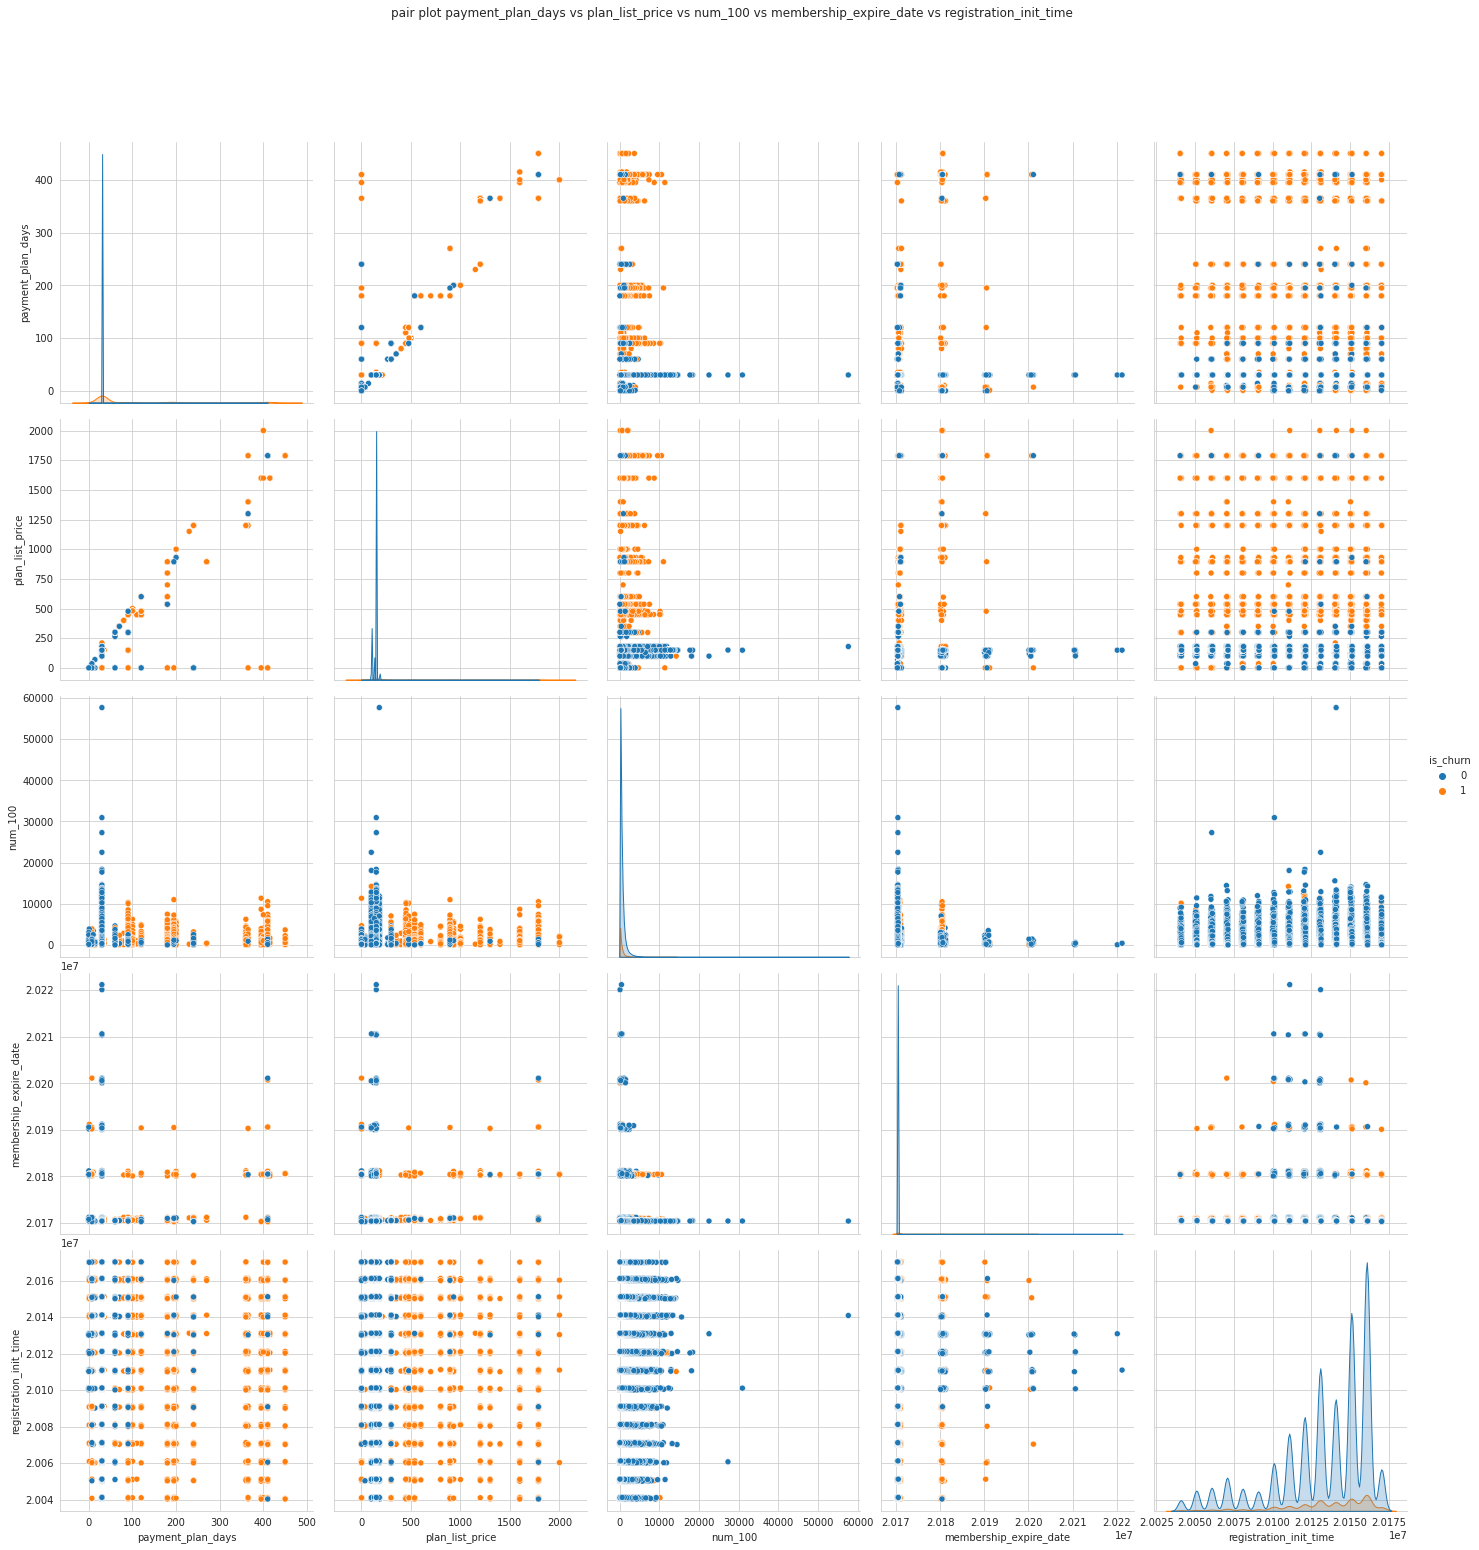

In [37]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(final_train_data, hue="is_churn", height=4, vars=["payment_plan_days","plan_list_price","num_100","membership_expire_date","registration_init_time"]).fig.suptitle("pair plot payment_plan_days vs plan_list_price vs num_100 vs membership_expire_date vs registration_init_time", y=1.08);

plt.show()

Firstly here there is no clear separation data between the churn and not churn users.


there are around 10000 songs listened which are of length 100, they performing better for classifying the not churn users and plan list price is also less than 250, so we can say that the users who listening more, there are more likley to not churn.

remaining features we already discussed about it. most of the features doesn't have clear separation of data. 

In [56]:
final_train_data.corr()['is_churn']


is_churn                  1.000000
payment_method_id        -0.203690
payment_plan_days         0.440341
plan_list_price           0.423548
actual_amount_paid        0.419095
is_auto_renew            -0.312608
transaction_date         -0.140808
membership_expire_date    0.292930
is_cancel                 0.394671
city                      0.081424
bd                        0.065719
registered_via           -0.080642
registration_init_time   -0.000021
num_25                   -0.009437
num_50                   -0.007654
num_75                   -0.012421
num_985                  -0.009567
num_100                  -0.021722
num_unq                  -0.020649
total_minutes            -0.022823
Name: is_churn, dtype: float64

from the above it was observed that payment_plan_days,plan_list_price are more co-related to churn or not churn

in the same way membership_expire_date, is_cancel, city, bd are also more co-related to predict churn or not churn users

**Conclusion**

Using the EDA, we're able to get some sense of the data, but most of the information is in the raw form. so we need to do lot of feature enginneering on the data and later we should analize the data

